# taq_self_response_year_avg_responses_time_shift_plot

#### Juan Camilo Henao Londono - 01.07.2019
#### AG Guhr - Universitaet Duisburg-Essen

In the following [link]() can be seen the plot of the function's results

In [1]:
# Modules

import numpy as np
from matplotlib import pyplot as plt
import os

import pickle

import taq_data_tools

__tau__ = 1000

In [2]:
def taq_self_response_year_avg_responses_time_shift_plot(ticker, year, shifts):
    """
    Plot the average cross response during a year and the dayly cross-response
    contributions in a figure. The data is loaded from the cross response data
    results.
        :param ticker: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param year: string of the year to be analized (i.e '2008')
    """

    try:

        function_name = taq_self_response_year_avg_responses_time_shift_plot. \
                        __name__
        taq_data_tools.taq_function_header_print_plot(function_name, ticker,
                                                      ticker, year, '', '')

        figure = plt.figure(figsize=(16, 9))

        for shift in shifts:

            self_ = pickle.load(open(''.join((
                            '../../taq_data/responses_time_shift_data_{1}/taq'
                            + '_self_response_year_responses_time_shift_data'
                            + '_shift_{2}/taq_self_response_year_responses'
                            + '_time_shift_data_shift_{2}_{1}_{0}.pickle')
                            .split()).format(ticker, year, shift), 'rb'))

            plt.semilogx(self_, linewidth=5, label='Shift {} s'.format(shift))

        self_ = pickle.load(open(''.join((
                            '../../taq_data/responses_time_shift_data_{1}/taq'
                            + '_self_response_year_responses_time_shift_data'
                            + '_shift_tau/taq_self_response_year_responses'
                            + '_time_shift_data_shift_tau_{1}_{0}.pickle')
                            .split()).format(ticker, year, shift), 'rb'))

        plt.semilogx(self_, linewidth=5, label=r'Shift $\tau / 2$')

        plt.legend(loc='best', fontsize=25)
        plt.title('Self-response - {}'.format(ticker), fontsize=40)
        plt.xlabel(r'$\tau \, [s]$', fontsize=35)
        plt.ylabel(r'$R_{ii}(\tau)$', fontsize=35)
        plt.xticks(fontsize=25)
        plt.yticks(fontsize=25)
        plt.xlim(1, 1000)
        # plt.ylim(13 * 10 ** -5, 16 * 10 ** -5)
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        plt.grid(True)
        plt.tight_layout()

        # Plotting
        taq_data_tools.taq_save_plot(function_name, figure, ticker, ticker,
                                     year, '')

        return None

    except FileNotFoundError as e:
        print('No data')
        print(e)
        print()
        return None

TAQ data
taq_self_response_year_avg_responses_time_shift_plot
Processing plot for the stock AAPL the 2008..
Folder to save data created
Plot saved



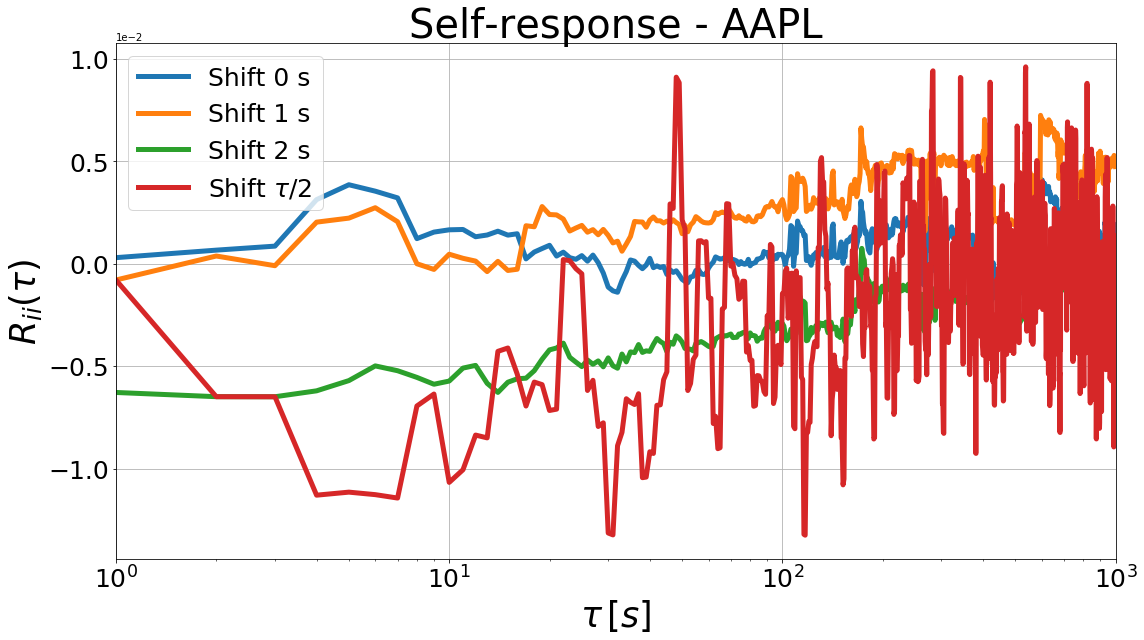

In [3]:
# Test

ticker = 'AAPL'
year = '2008'
shifts = [0, 1, 2]
taq_self_response_year_avg_responses_time_shift_plot(ticker, year, shifts)